<a href="https://colab.research.google.com/github/AzlinRusnan/Housing_Price_Analysis/blob/main/Housing_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Description**

In [39]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [92]:
file_path = '/content/gdrive/MyDrive/Housing.csv'

df = pd.read_csv(file_path)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


##### **Columns Explanation:**

The dataset appears to be about housing properties and includes details such as:

*   **price:** Property price.
*   **area:** The area of the property in square feet.
*   **bedrooms:** Number of bedrooms.
*   **bathrooms:** Number of bathrooms.
*   **stories:** Number of floors.
*   **mainroad:** Whether the property has access to a main road (yes/no).
*   **guestroom:** Availability of a guest room (yes/no).
*   **basement:** Presence of a basement (yes/no).
*   **hotwaterheating:** Availability of hot water heating (yes/no).
*   **airconditioning:** Availability of air conditioning (yes/no).
*   **parking:** Number of parking spaces.
*   **prefarea:** Preferred area status (yes/no). Indicates whether the property is located in a desirable or preferred area, which could mean a high-demand or premium neighborhood.
*   **furnishingstatus:** Furnishing status, which could be "furnished," "semi-furnished," or "unfurnished."














##### **Checking the Total Number of Missing Values**

In [ ]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


There is no missing values recorded.

##### **Target Variable**

The target variable (dependent variable) should be continuous, so I chose Price as the target (y).

#### **Data Visualization**

Lets try to understand the data using visualisation.

##### **Converting Rupee to MYR**

It is always fascinating to convert foreign currency to MYR, as it gives us a clearer picture of the housing situation in other countries! 😉

In [ ]:
# Import necessary libraries
import pandas as pd

# Conversion rate from INR to MYR
conversion_rate = 0.05225

# Convert prices from INR to MYR
df['price_myr'] = df['price'] * conversion_rate

# Select relevant columns for the table
comparison_table = df[['price', 'price_myr']]


comparison_table = comparison_table.rename(columns={'price': 'price_inr', 'price_myr': 'price_myr'})

print(comparison_table)

     price_inr    price_myr
0     13300000  694925.0000
1     12250000  640062.5000
2     12250000  640062.5000
3     12215000  638233.7500
4     11410000  596172.5000
..         ...          ...
540    1820000   95095.0000
541    1767150   92333.5875
542    1750000   91437.5000
543    1750000   91437.5000
544    1750000   91437.5000

[545 rows x 2 columns]


##### **Visualising Numeric Variables**

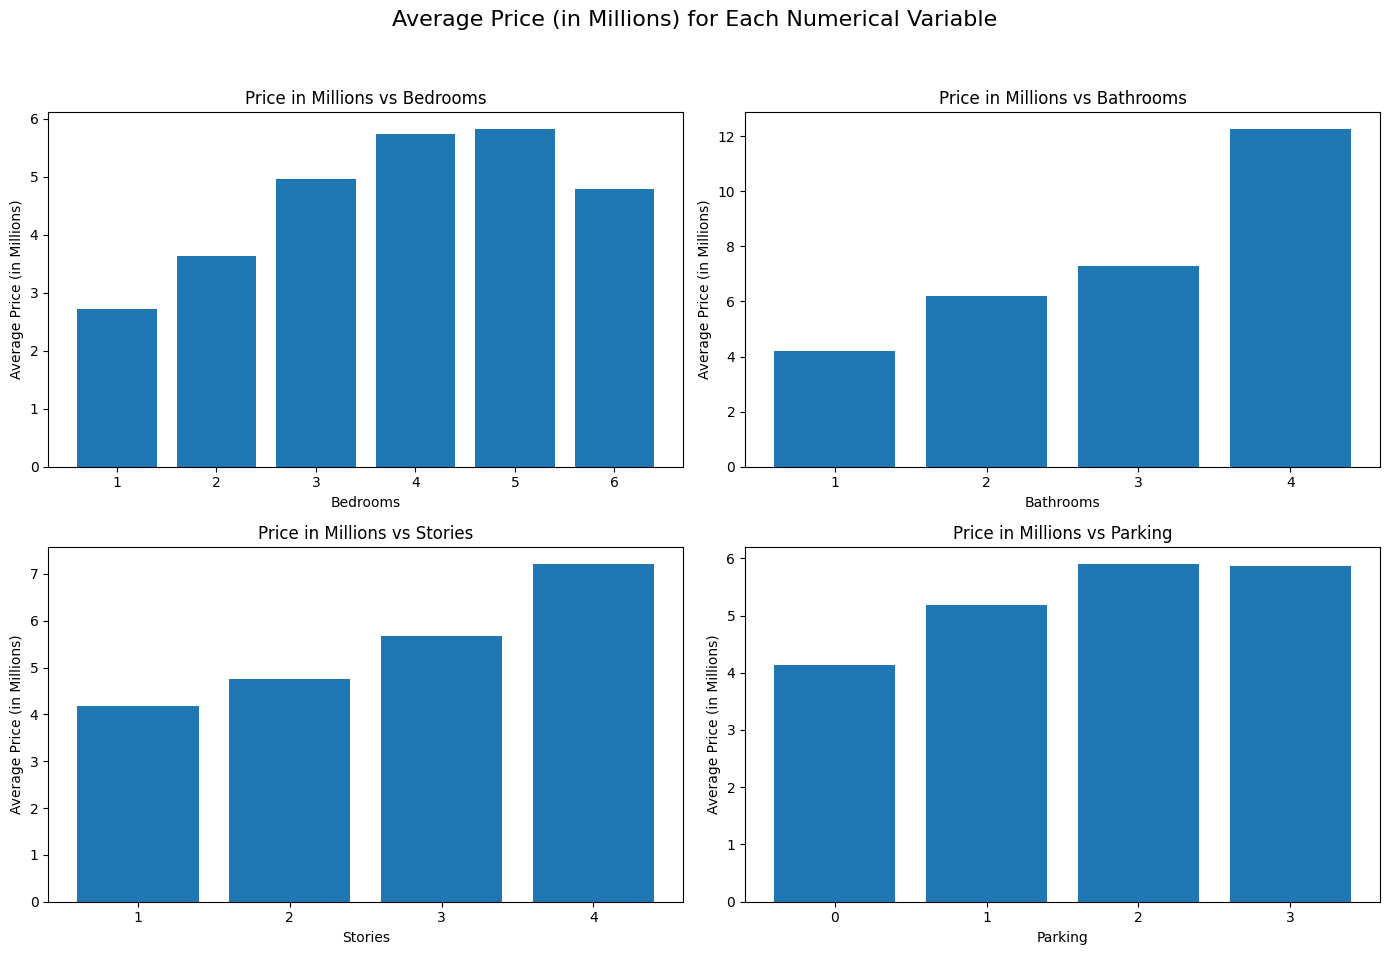

In [ ]:
df['price_million'] = df['price'] / 1e6

# Define numerical columns to plot against price
numerical_columns = ['bedrooms', 'bathrooms', 'stories', 'parking']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Average Price (in Millions) for Each Numerical Variable', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Generate each bar plot on the respective subplot
for i, column in enumerate(numerical_columns):
    avg_price = df.groupby(column)['price_million'].mean()

    # Plotting on respective subplot
    axes[i].bar(avg_price.index, avg_price.values)
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Average Price (in Millions)')
    axes[i].set_title(f'Price in Millions vs {column.capitalize()}')
    axes[i].set_xticks(np.arange(min(df[column]), max(df[column]) + 1, 1))

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


###### **Insights:**

We can see that a greater number of bedrooms, bathrooms, stories, and parking spaces contribute to higher housing prices.

##### **Visualising Categorical Variables**

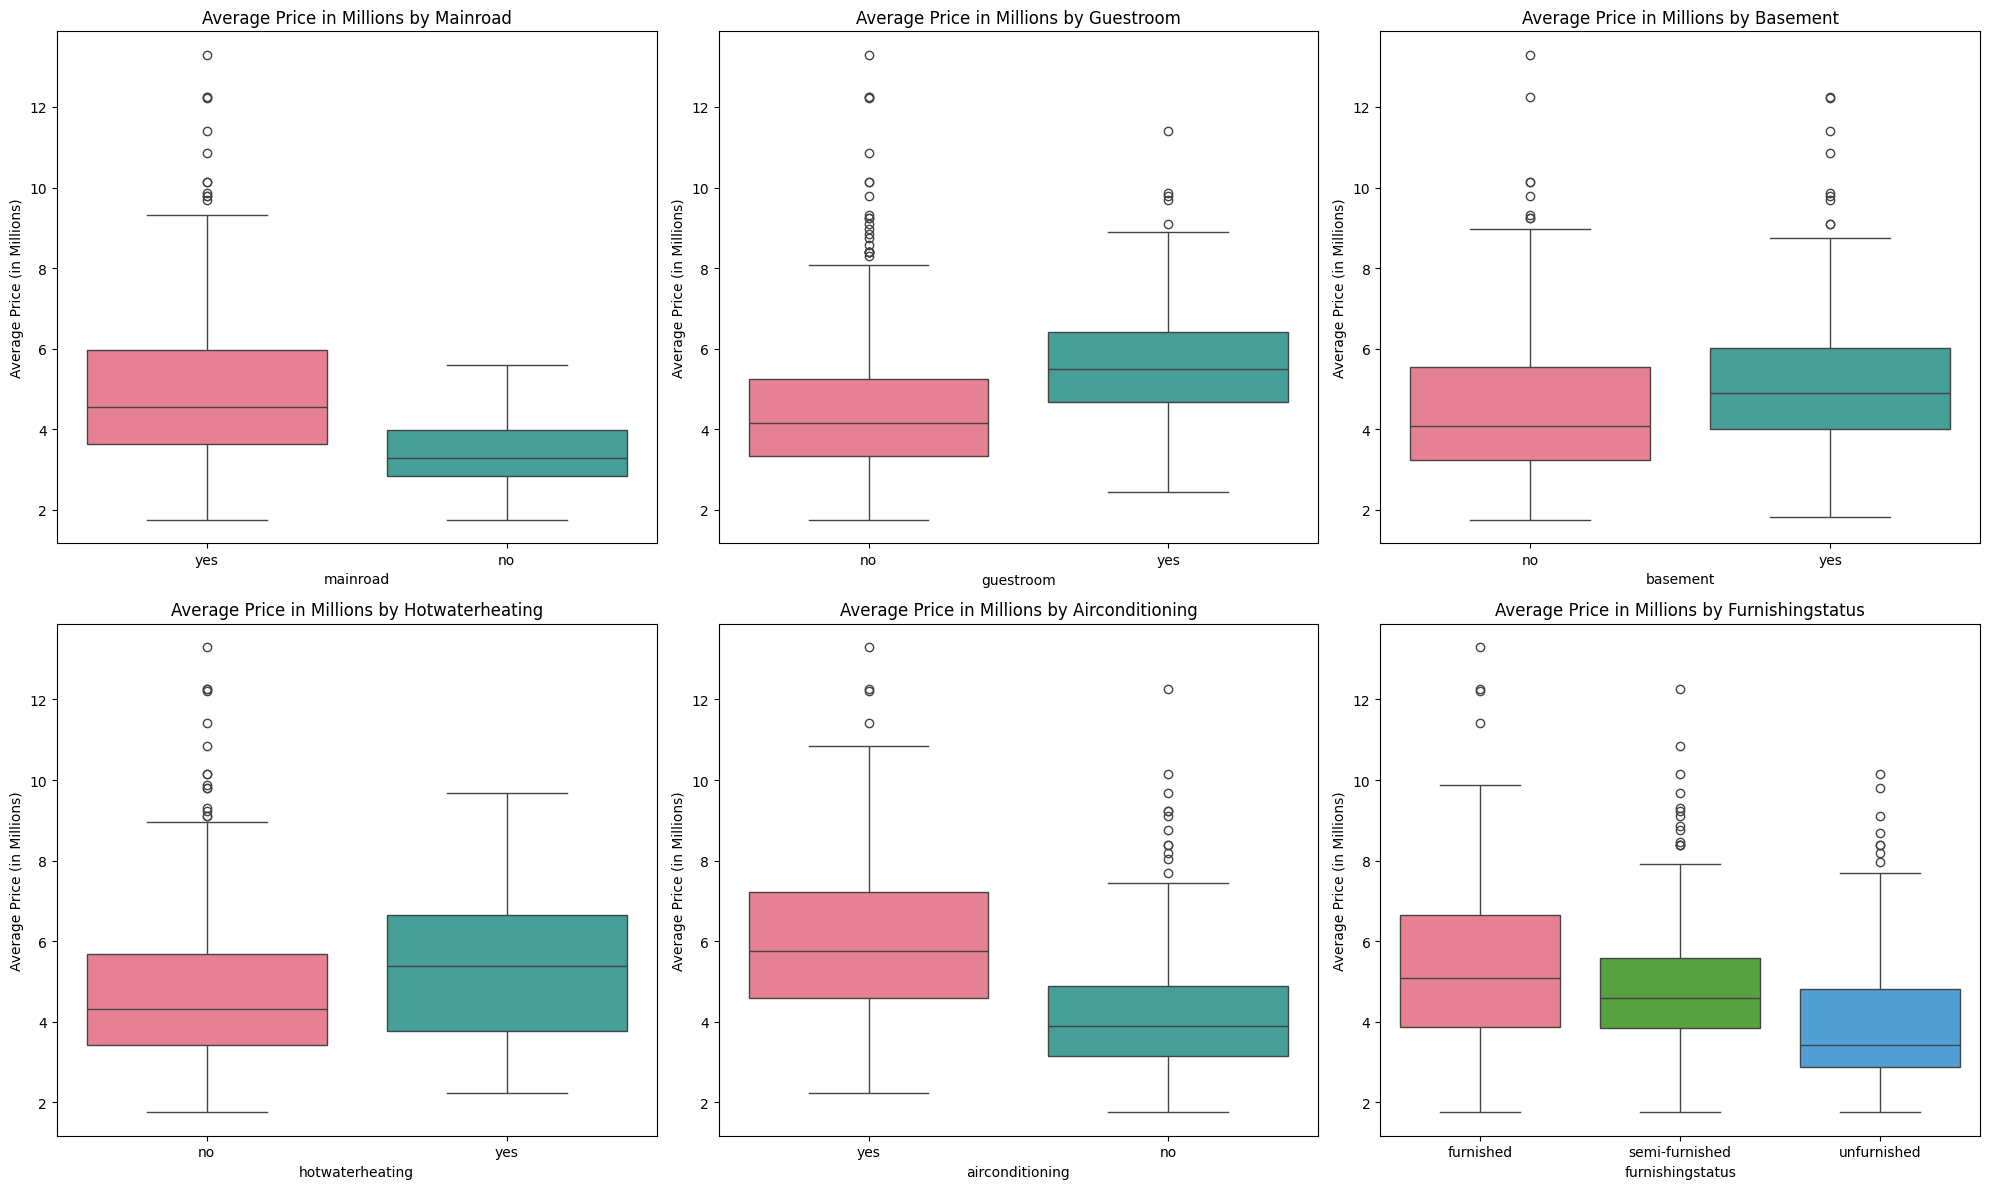

In [ ]:
# Convert the price to millions for readability
df['price_million'] = df['price'] / 1e6

# Plot each boxplot in a 2x3 grid layout with average price in millions
plt.figure(figsize=(20, 12))

for i, category in enumerate(categories, start=1):
    plt.subplot(2, 3, i)

    # Calculate average price for each category and plot as boxplot
    avg_price = df.groupby(category)['price_million'].mean()
    sns.boxplot(x=category, y='price_million', data=df, palette=sns.color_palette("husl", len(df[category].unique())))

    plt.title(f'Average Price in Millions by {category.capitalize()}')
    plt.ylabel('Average Price (in Millions)')

plt.tight_layout()
plt.show()

###### **Insights:**

We can see that a 'yes' contributing to higher housing price.

#### **Data Preparation**

In order to fit a regression line, we need to convert 'yes' and 'no' to 1 and 0.

In [94]:
# Converting binary categorical columns to numerical (0 for 'no', 1 for 'yes')
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_columns] = df[binary_columns].applymap(lambda x: 1 if x == 'yes' else 0)

# Applying one-hot encoding to 'furnishingstatus' column
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

df[['furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']] = df[
    ['furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
].astype(int)


# Display the first few rows of the transformed dataset to verify the changes
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### **Scaling the Features**

All columns have small integer values, so it's important to rescale them to a similar scale. Otherwise, some regression model coefficients may end up much larger or smaller than others.

In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df[num_vars] = scaler.fit_transform(df[num_vars])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1,0
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0,0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0,0


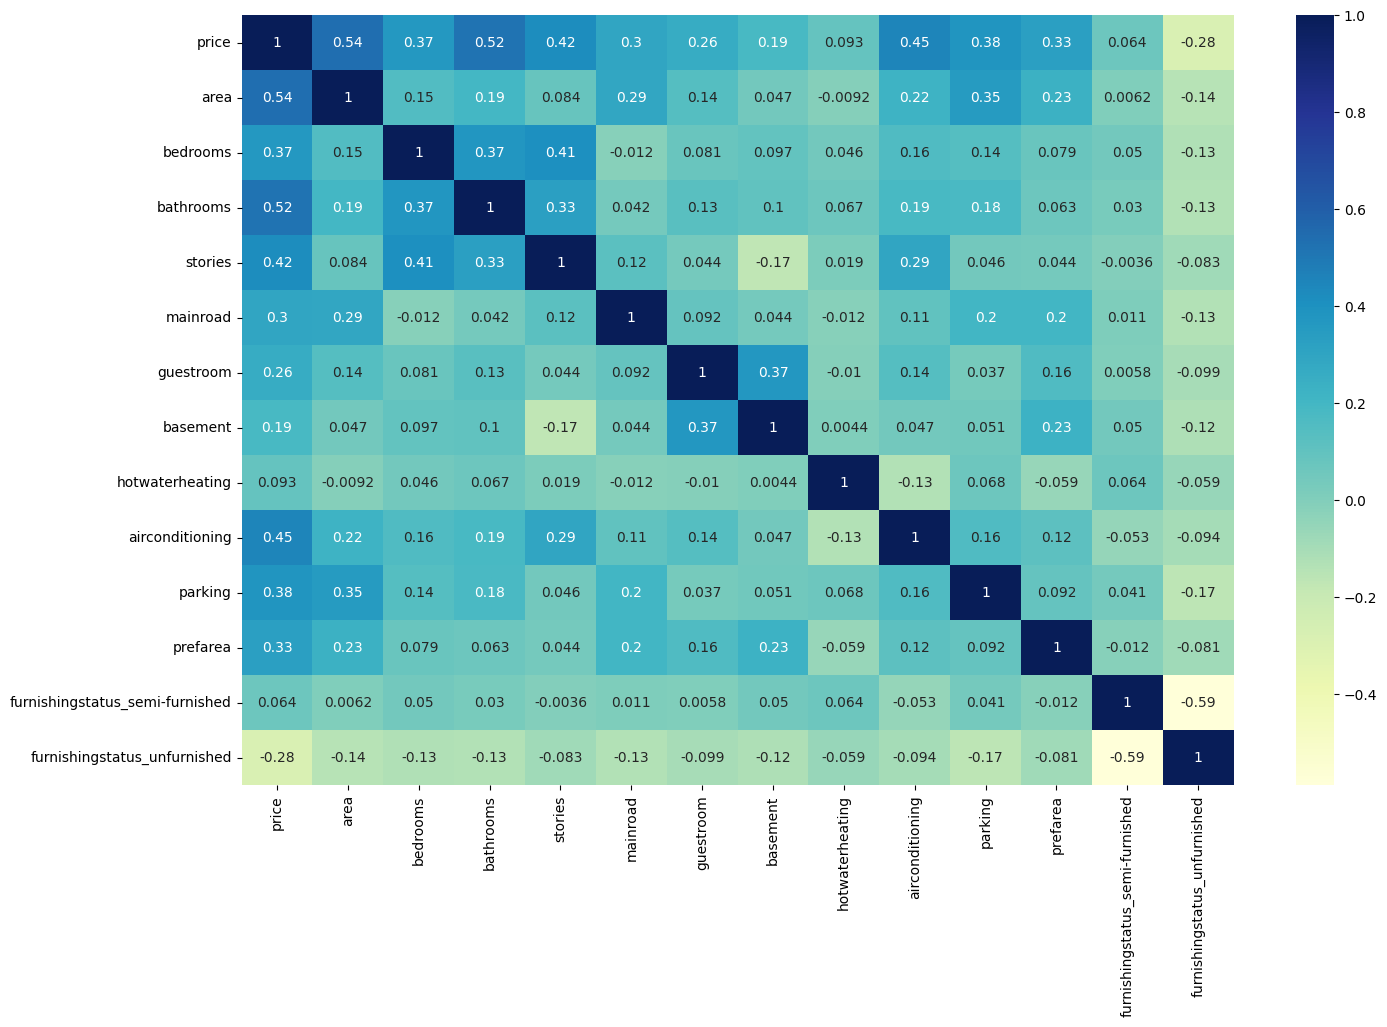

In [96]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

###### **Insights:**

- Variables like area (0.54), bathrooms (0.52), and stories (0.42) have relatively strong positive correlations with price.
- This suggests that these factors might be significant predictors of housing price in a regression model

## **The Models**

### **Multiple Linear Regression Model**

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

In [98]:
X = df.drop(columns=['price'])
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [99]:
X_ols = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X_ols).fit()

# Display the summary of the OLS model, including coefficients, p-values, and other statistics
ols_summary = ols_model.summary()
ols_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          9.07e-123
Time:                        05:45:21   Log-Likelihood:                 531.39
No. Observations:                 545   AIC:                            -1035.
Df Residuals:                     531   BIC:                            -974.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0216      0.018      1.183      0.237      -0.014       0.057
area                                0.3076      0.031     10.052      0.000       0.247       0.368
bedrooms                            0.0497      0.031      1.581      0.114      -0.012       0.111
bathrooms                           0.2565      0.027      9.555      0.000       0.204       0.309
stories                             0.1171      0.017      7.026      0.000       0.084       0.150
mainroad                            0.0365      0.012      2.962      0.003       0.012       0.061
guestroom                           0.0260      0.011      2.282      0.023       0.004       0.048
basement                            0.0303      0.010      3.175      0.002       0.012       0.049
hotwaterheating                     0.0741      0.019      3.833      0.000       0.036       0.112
airconditioning                     0.0749      0.009      7.983      0.000       0.056       0.093
parking                             0.0720      0.015      4.735      0.000       0.042       0.102
prefarea                            0.0564      0.010      5.632      0.000       0.037       0.076
furnishingstatus_semi-furnished    -0.0040      0.010     -0.398      0.691      -0.024       0.016
furnishingstatus_unfurnished       -0.0356      0.011     -3.258      0.001      -0.057      -0.014
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### **Insights:**

Looking at the p-values, some variables don't seem significant when others are included. Perhaps we could drop a few? We could start by removing the variable with the highest non-significant p-value, and further refine this by considering VIF information.

###### **Checking with VIF:**

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,7.37
4,mainroad,6.09
0,area,5.01
3,stories,2.70
11,furnishingstatus_semi-furnished,2.19
9,parking,2.12
6,basement,2.01
12,furnishingstatus_unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


We want a VIF below 5, so we need to drop some variables

In [101]:
# Step 1: Drop 'furnishingstatus_semi-furnished' and create the first model
X_train = X_train.drop('furnishingstatus_semi-furnished', axis=1)
X_train_lm1 = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train, X_train_lm1).fit()
print("Model without 'furnishingstatus_semi-furnished':\n", lr_2.summary())

Model without 'furnishingstatus_semi-furnished':
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.07e-83
Time:                        05:46:19   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [103]:
# Calculate the VIFs again for the new model

# Calculate the VIFs for the updated X_train after dropping 'furnishingstatus_semi-furnished'
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print("VIF after dropping 'furnishingstatus_semi-furnished':\n", vif)

VIF after dropping 'furnishingstatus_semi-furnished':
                         Features   VIF
1                       bedrooms  6.63
4                       mainroad  5.75
0                           area  5.01
3                        stories  2.69
9                        parking  2.12
6                       basement  2.01
8                airconditioning  1.77
2                      bathrooms  1.67
10                      prefarea  1.50
5                      guestroom  1.47
11  furnishingstatus_unfurnished  1.40
7                hotwaterheating  1.14


###### **Insights:**

As we might have noticed, the variable bedroom has a significantly high VIF (6.63) and a high p-value (0.206) as well. Hence, this variable isn't of much use and should be dropped.

In [104]:
# Step 2: Drop 'bedrooms' and create the second model
X_train = X_train.drop('bedrooms', axis=1)
X_train_lm2 = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train, X_train_lm2).fit()
print("\nModel without 'bedrooms':\n", lr_3.summary())


Model without 'bedrooms':
                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           2.73e-84
Time:                        05:49:17   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [105]:
# Calculate the VIFs for the updated X_train after dropping 'bedrooms'
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print("VIF after dropping 'bedrooms':\n", vif)

VIF after dropping 'bedrooms':
                         Features   VIF
3                       mainroad  4.92
0                           area  4.84
2                        stories  2.23
8                        parking  2.10
5                       basement  1.87
7                airconditioning  1.77
1                      bathrooms  1.61
9                       prefarea  1.50
4                      guestroom  1.46
10  furnishingstatus_unfurnished  1.33
6                hotwaterheating  1.13
